#📌 Extracción

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importar datos

import pandas as pd
import requests
import json

datos = requests.get('https://raw.githubusercontent.com/JGP-Code/TelecomX_LATAM_Challenge/refs/heads/main/TelecomX_Data.json')
datos_extraccion = json.loads(datos.text)
pd.DataFrame(datos_extraccion)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
#Extracción de datos agrupados json (normalización de datos o aplanar el archivo)

datos_normalizados = pd.json_normalize(datos_extraccion)
datos_normalizados.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:
datos_normalizados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
import numpy as np

In [ ]:
datos_normalizados['account.Charges.Total'].isnull().any()

np.False_

In [ ]:
# Convierte todo a string y busca los que no son números válidos
no_numericos = datos_normalizados.loc[~datos_normalizados['account.Charges.Total'].astype(str).str.replace('.', '', 1).str.isnumeric(),
                      'account.Charges.Total']
print(no_numericos.head())


975      
1775     
1955     
2075     
2232     
Name: account.Charges.Total, dtype: object


In [ ]:
#primero convierto todo a str
#después elimino espacios en blanco antes y despues de los números
#👉 \s+ significa “uno o más espacios en blanco” (incluye espacios, tabulaciones, saltos de línea)
#por último convierto a float64

datos_normalizados['account.Charges.Total'] = datos_normalizados['account.Charges.Total'].astype(str)

datos_normalizados['account.Charges.Total'] = datos_normalizados['account.Charges.Total'].astype(str).str.replace(r'\s+', '', regex=True).replace('', np.nan)

datos_normalizados['account.Charges.Total'] = datos_normalizados['account.Charges.Total'].astype('float64')


In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#revisando la información de los valores NaN de account.Charges.Total en todas las columnas
datos_normalizados[datos_normalizados['account.Charges.Total'].isna()]


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [ ]:
#convertir los valores NaN a 0

datos_normalizados['account.Charges.Total'] = datos_normalizados['account.Charges.Total'].fillna(0)

In [ ]:
#validando el cambio
datos_normalizados[datos_normalizados['account.Charges.Total'] == 0]


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [ ]:
datos_normalizados[datos_normalizados['customer.tenure'] == 0]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [ ]:
#validar los datos de cada columna para identificar inconsistencias

for columna in datos_normalizados.columns:
    print(columna)
    print(datos_normalizados[columna].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
customer.gender
['Female' 'Male']
customer.SeniorCitizen
[0 1]
customer.Partner
['Yes' 'No']
customer.Dependents
['Yes' 'No']
customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService
['Yes' 'No']
phone.MultipleLines
['No' 'Yes' 'No phone service']
internet.InternetService
['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity
['No' 'Yes' 'No internet service']
internet.OnlineBackup
['Yes' 'No' 'No internet service']
internet.DeviceProtection
['No' 'Yes' 'No internet service']
internet.TechSupport
['Yes' 'No' 'No internet service']
internet.StreamingTV
['Yes' 'No' 'No internet service']
internet.StreamingMovies
['No' 'Yes' 'No internet service']
account.Contract
['One year' 'M

In [ ]:
#cambiar los datos No internet service de todas las columnas por No

datos_normalizados = datos_normalizados.replace(['No internet service','No phone service'], 'No')

In [ ]:
#reviso que los cambios se aplicaran correctamente
for columna in datos_normalizados.columns:
    print(columna)
    print(datos_normalizados[columna].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
customer.gender
['Female' 'Male']
customer.SeniorCitizen
[0 1]
customer.Partner
['Yes' 'No']
customer.Dependents
['Yes' 'No']
customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService
['Yes' 'No']
phone.MultipleLines
['No' 'Yes']
internet.InternetService
['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity
['No' 'Yes']
internet.OnlineBackup
['Yes' 'No']
internet.DeviceProtection
['No' 'Yes']
internet.TechSupport
['Yes' 'No']
internet.StreamingTV
['Yes' 'No']
internet.StreamingMovies
['No' 'Yes']
account.Contract
['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling
['Yes' 'No']
account.PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'B

In [ ]:
#verificar información duplicada

datos_normalizados.duplicated().sum()

np.int64(0)

In [ ]:
#verificar valores nulos

datos_normalizados.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#verificar valores vacios o en blanco

datos_normalizados.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#Eliminar los datos vacios de Churn ya que no se sabe si el campo es Yes o No, la mejor opción es eliminar los datos para no perjudicar la muestra.
#.strip elimina espacios al inicio y al final, para detectar valores vacíos como "   "

datos_normalizados = datos_normalizados[datos_normalizados['Churn'].str.strip() != '']
print('Número de filas después de eliminar os vacíos en "Churn":', len(datos_normalizados))

Número de filas después de eliminar os vacíos en "Churn": 7043


In [ ]:
datos_normalizados.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
'''Opcional'''
#crear la columna "Cuentas_Diarias". Utiliza la facturación
#mensual para calcular el valor diario, proporcionando una visión
#más detallada del comportamiento de los clientes a lo largo del tiempo.

datos_normalizados['Cuentas_Diarias'] = datos_normalizados['account.Charges.Monthly']/30.42

In [ ]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [ ]:
'''Opcional'''
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)

cols_yes_no = [col for col in datos_normalizados.columns
    if set(datos_normalizados[col].dropna().unique()).issubset({"Yes", "No"})]
datos_normalizados[cols_yes_no] = (datos_normalizados[cols_yes_no].apply(lambda col: col.map({"Yes": 1, "No": 0})))


In [ ]:
#revisamos los datos unicos nuevamente para comprobar los cambios

for columna in datos_normalizados.columns:
    print(columna)
    print(datos_normalizados[columna].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
[0 1]
customer.gender
['Female' 'Male']
customer.SeniorCitizen
[0 1]
customer.Partner
[1 0]
customer.Dependents
[1 0]
customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone.PhoneService
[1 0]
phone.MultipleLines
[0 1]
internet.InternetService
['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity
[0 1]
internet.OnlineBackup
[1 0]
internet.DeviceProtection
[0 1]
internet.TechSupport
[1 0]
internet.StreamingTV
[1 0]
internet.StreamingMovies
[0 1]
account.Contract
['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling
[1 0]
account.PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.Charges.Monthly
[65.6  59.9  73.9  ... 91.75 68.8  6

#📊 Carga y análisis

In [ ]:
datos_normalizados[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.128918
std,24.559481,30.090047,2266.794470,0.989153
min,0.000000,18.250000,0.000000,0.599934
25%,9.000000,35.500000,398.550000,1.166995
50%,29.000000,70.350000,1394.550000,2.312623
75%,55.000000,89.850000,3786.600000,2.953649
max,72.000000,118.750000,8684.800000,3.903682


In [ ]:
#calculando métricas - media

media_mes = datos_normalizados['account.Charges.Monthly'].mean()
media_ano = datos_normalizados['account.Charges.Total'].mean()
print(f'La media del pago mensual es: {media_mes:.2f}\nLa media del pago anual es:{media_ano:.2f}')

La media del pago mensual es: 64.76
La media del pago anual es:2279.73


In [ ]:
#calculando métricas - mediana

mediana_mes = datos_normalizados['account.Charges.Monthly'].median()
mediana_ano = datos_normalizados['account.Charges.Total'].median()
print(f'La mediana del pago mensual es: {mediana_mes:.2f}\nLa mediana del pago anual es:{mediana_ano:.2f}')

La mediana del pago mensual es: 70.35
La mediana del pago anual es:1394.55


In [ ]:
#calculando métricas - moda

moda_mes = datos_normalizados['account.Charges.Monthly'].mode()[0]
moda_ano = datos_normalizados['account.Charges.Total'].mode()[0]

frec_mes = (datos_normalizados['account.Charges.Monthly'] == moda_mes).sum()
frec_ano = (datos_normalizados['account.Charges.Total'] == moda_ano).sum()

print(f'La moda del pago mensual es: {moda_mes} y la frecuencua es:{frec_mes}')
print(f'La moda del pago anual es: {moda_ano} y la frecuencua es:{frec_ano}')

La moda del pago mensual es: 20.05 y la frecuencua es:61
La moda del pago anual es: 0.0 y la frecuencua es:11


In [ ]:
#calculando métricas - desviación estandar

desviacion_mes = datos_normalizados['account.Charges.Monthly'].std()
desviacion_ano = datos_normalizados['account.Charges.Total'].std()
print(f'La desviación estandar del pago mensual es: {desviacion_mes:.2f}\nLa desviación estandar del pago anual es:{desviacion_ano:.2f}')

La desviación estandar del pago mensual es: 30.09
La desviación estandar del pago anual es:2266.79


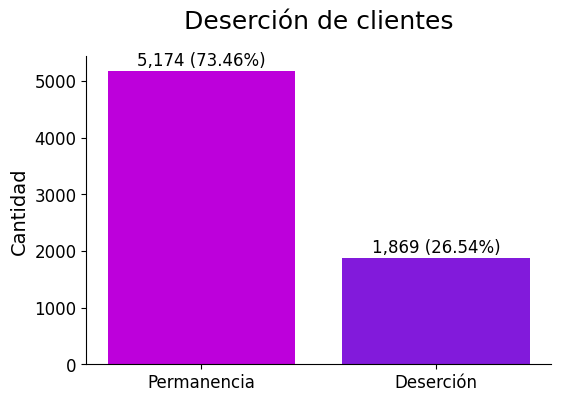

In [ ]:
#gráfica de deserción de clientes

import matplotlib.pyplot as plt
import seaborn as sns

cuenta_desercion = datos_normalizados['Churn'].value_counts().sort_index()
porcentaje_desercion = datos_normalizados['Churn'].value_counts(normalize=True).sort_index() * 100

# Renombrar categorías para el eje X
etiquetas = ['Permanencia', 'Deserción']  # 0 → Permanencia, 1 → Deserción

colores = ['#BD00DB', '#821ADB']

fig, ax = plt.subplots(figsize=(6, 4))

#barra principal
ax.bar(etiquetas, cuenta_desercion.values, color=colores)


ax.set_title('Deserción de clientes',
             loc='center', fontsize=18, pad = 20)
ax.set_xlabel('') #en este caso dejo vacio
ax.set_ylabel('Cantidad', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#etiquetas barra principal
for i, (cant, pct) in enumerate(zip(cuenta_desercion.values, porcentaje_desercion.values)):
    ax.text(i, cant + 0.02 * max(cuenta_desercion.values),
            f"{cant:,} ({pct:.2f}%)",
            ha='center', fontsize=12)

#eliminar la línea superior del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Género**

In [ ]:
#¿quién contrata más el servicio hombres o mujeres?

datos_normalizados['customer.gender'] = (datos_normalizados['customer.gender'].replace({'Male': 'Hombre', 'Female': 'Mujer'}))

cuenta_genero = datos_normalizados['customer.gender'].value_counts()
porcentaje_genero = datos_normalizados['customer.gender'].value_counts(normalize=True) * 100

df_genero = pd.DataFrame({'Cantidad': cuenta_genero, 'Porcentaje': porcentaje_genero})

df_genero['Cantidad'] = df_genero['Cantidad'].map('{:,.0f}'.format)
df_genero['Porcentaje'] = df_genero['Porcentaje'].map('{:.2f}%'.format)

df_genero.index.name = 'Genero'

df_genero

,Cantidad,Porcentaje
Genero,,
Hombre,"3,555",50.48%
Mujer,"3,488",49.52%


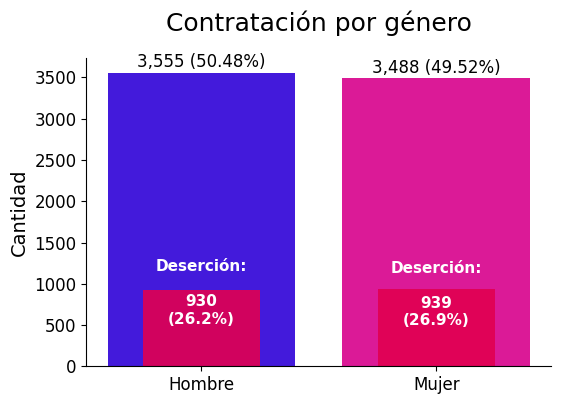

In [61]:
#gráfica de porcentaje de género

import matplotlib.pyplot as plt
import seaborn as sns

cuenta_genero = datos_normalizados['customer.gender'].value_counts()
porcentaje_genero = datos_normalizados['customer.gender'].value_counts(normalize=True) * 100

churn_cuenta_genero = datos_normalizados.groupby('customer.gender')['Churn'].sum()
churn_porcentaje_genero = datos_normalizados.groupby('customer.gender')['Churn'].mean() * 100


colores = ['#431ADB', '#DB1A97']
colores_churn = ['#E10050']    # barras sombreadas (más oscuras)

fig, ax = plt.subplots(figsize=(6, 4))

#barra principal
ax.bar(cuenta_genero.index, cuenta_genero.values, color=colores)

#barra secundaria churn
ax.bar(cuenta_genero.index, churn_cuenta_genero.values, color=colores_churn,
    width=0.5,          # más delgada para que se vea como "sombreado"
    alpha=0.9)


ax.set_title('Contratación por género',
             loc='center', fontsize=18, pad = 20)
ax.set_xlabel('') #en este caso dejo vacio
ax.set_ylabel('Cantidad', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#etiquetas barra principal
for i, (cant, pct) in enumerate(zip(cuenta_genero.values, porcentaje_genero.values)):
    ax.text(i, cant + 0.02 * max(cuenta_genero.values),
            f"{cant:,} ({pct:.2f}%)",
            ha='center', fontsize=12)

#etiquetas Churn
for i, (cant_churn, pct_churn) in enumerate(zip(churn_cuenta_genero.values, churn_porcentaje_genero.values)):
    ax.text(i, cuenta_genero.values[i] * 0.25,   # posición vertical de la etiqueta "Clientes retirados"
            f"Deserción:\n\n{cant_churn:,}\n({pct_churn:.1f}%)",
            ha='center', va='center',
            fontsize=11, color='white', fontweight='bold')


#eliminar la línea superior del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



In [ ]:
datos_normalizados.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Mujer,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.156476
1,0003-MKNFE,0,Hombre,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.969099


**Tipo de contrato**

In [ ]:
#Tipo de contrato de los contratos de los clientes

datos_normalizados['account.Contract'] = (datos_normalizados['account.Contract'].replace({'Month-to-month': 'Mes a Mes', 'Two year': 'Dos Años', 'One year': 'Un Año'}))

cuenta_contrato = datos_normalizados['account.Contract'].value_counts()
porcentaje_contrato = datos_normalizados['account.Contract'].value_counts(normalize=True) * 100

df_contrato = pd.DataFrame({'Cantidad': cuenta_contrato, 'Porcentaje': porcentaje_contrato})

df_contrato['Cantidad'] = df_contrato['Cantidad'].map('{:,.0f}'.format)
df_contrato['Porcentaje'] = df_contrato['Porcentaje'].map('{:.2f}%'.format)

df_contrato.index.name = 'Tipo de contrato'

df_contrato

,Cantidad,Porcentaje
Tipo de contrato,,
Mes a Mes,"3,875",55.02%
Dos Años,"1,695",24.07%
Un Año,"1,473",20.91%


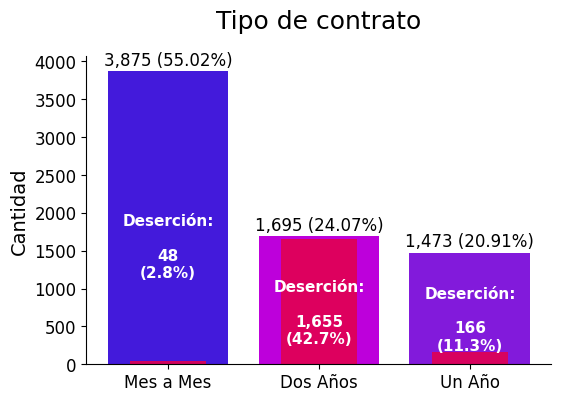

In [60]:
#gráfica de tipo de contrato

#datos de tipo de contrato
cuenta_contrato = datos_normalizados['account.Contract'].value_counts()
porcentaje_contrato = datos_normalizados['account.Contract'].value_counts(normalize=True) * 100

#datos de Churn
churn_cuenta_contrato = datos_normalizados.groupby('account.Contract')['Churn'].sum()
churn_porcentaje_contrato = datos_normalizados.groupby('account.Contract')['Churn'].mean() * 100

colores = ['#431ADB', '#BD00DB', '#821ADB']
colores_churn = ['#E10050']    # barras sombreadas (más oscuras)

fig, ax = plt.subplots(figsize=(6, 4))

#barra principal, tipo de contrato
ax.bar(cuenta_contrato.index, cuenta_contrato.values, color=colores)

#barra secundaria churn
ax.bar(cuenta_contrato.index, churn_cuenta_contrato.values, color=colores_churn,
    width=0.5,          # más delgada para que se vea como "sombreado"
    alpha=0.9)

ax.set_title('Tipo de contrato',
             loc='center', fontsize=18, pad = 20)
ax.set_xlabel('') #en este caso dejo vacio
ax.set_ylabel('Cantidad', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#etiquetas barra principal
for i, (cant, pct) in enumerate(zip(cuenta_contrato.values, porcentaje_contrato.values)):
    ax.text(i, cant + 0.02 * max(cuenta_contrato.values),
            f"{cant:,} ({pct:.2f}%)",
            ha='center', fontsize=12)

#etiquetas de churn
for i, (cant_churn, pct_churn) in enumerate(zip(churn_cuenta_contrato.values, churn_porcentaje_contrato.values)):
    ax.text(i, cuenta_contrato.values[i] * 0.4,   # posición vertical de la etiqueta "Clientes retirados"
            f"Deserción:\n\n{cant_churn:,}\n({pct_churn:.1f}%)",
            ha='center', va='center',
            fontsize=11, color='white', fontweight='bold')


#eliminar la línea superior del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Los contratos "Mes a Mes" tienen muchos clientes y poca deserción.**

**Los contratos de "Dos Años" tienen menos clientes, pero el número de desertores es más alto en términos absolutos.**

**Los contratos de "Un Año" tienen menos clientes, pero el número de desertores es bajo.**

**Antigüedad**

In [ ]:
#tabla dinámica con pivot

# Crear tabla dinámica
tabla_pivot_churn = datos_normalizados.pivot_table(
    values='Churn',               # clientes que se fueron
    index='customer.tenure',      # meses de contrato
    columns='account.Contract',   # tipo de contrato
    aggfunc='mean'                # porcentaje de churn
)

tabla_pivot_churn

account.Contract,Dos Años,Mes a Mes,Un Año
customer.tenure,,,
0,0.000000,NaN,0.000000
1,0.000000,0.629139,0.000000
2,0.000000,0.526087,0.285714
3,0.000000,0.492147,0.000000
4,0.000000,0.496970,0.142857
...,...,...,...
68,0.030769,0.300000,0.160000
69,0.030303,0.500000,0.130435
70,0.056818,0.250000,0.185185


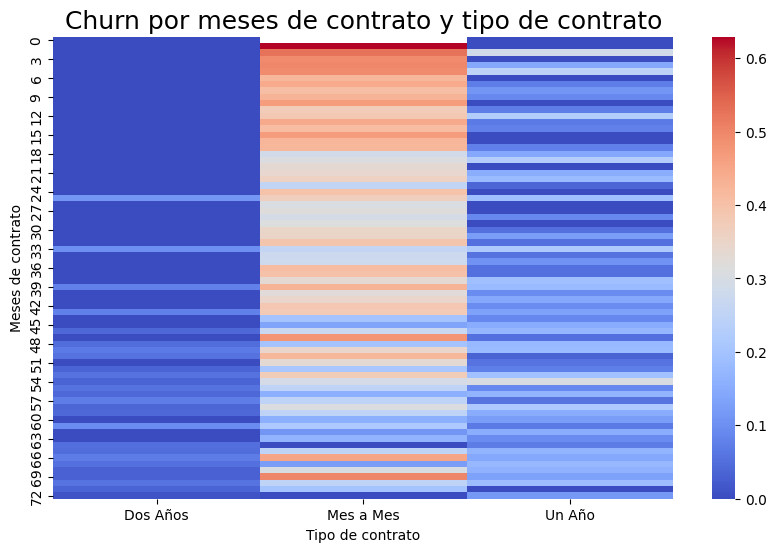

In [ ]:
#gráfica

plt.figure(figsize=(10,6))
sns.heatmap(tabla_pivot_churn, cmap='coolwarm', annot=False)
plt.title('Churn por meses de contrato y tipo de contrato', fontsize=18)
plt.xlabel('Tipo de contrato')
plt.ylabel('Meses de contrato')
plt.show()


**Los contratos "Mes a Mes" tienen tasas de deserción más altas, especialmente en los primeros meses. Es decir, son más propensos a desertar.**

**Los contratos "Mes a Mes" son más vulnerables al abandono temprano, pero muchos clientes se quedan.**

**Los contratos de "Dos Años" parecen tener una deserción masiva, posiblemente al final del contrato o por insatisfacción acumulada.**


In [91]:
#gráfica de deserción por mes

import plotly.express as px

fig = px.histogram(datos_normalizados, x='customer.tenure', color=datos_normalizados['Churn'].map({0: 'Permanencia', 1: 'Deserción'}),
             barmode='group', text_auto=True,
             labels={'customer.tenure': 'Meses de contrato', 'Churn': 'Acción'},
             )
fig.update_layout(legend_title_text='Estado del cliente')
fig.update_yaxes(title_text='Cantidad')
fig.update_traces(textposition = 'outside', textfont_size=14)

fig.show()

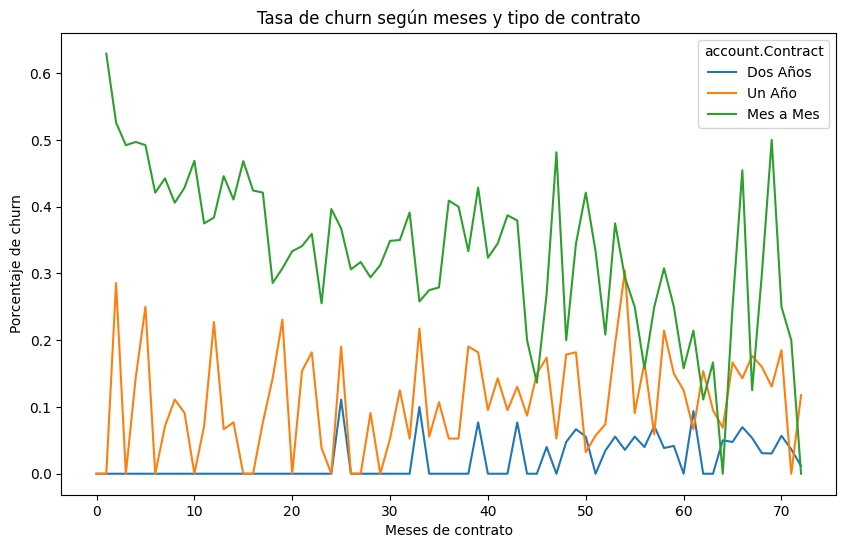

In [ ]:
tabla_churn = datos_normalizados.groupby(['customer.tenure', 'account.Contract'])['Churn'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=tabla_churn, x='customer.tenure', y='Churn', hue='account.Contract')
plt.title('Tasa de churn según meses y tipo de contrato')
plt.ylabel('Porcentaje de churn')
plt.xlabel('Meses de contrato')
plt.show()


#📄Informe final